# Heat Map of vascular phenotypes genes (Pascal) intersection 
## PROBLEM: without merge cells => The image needs to be done manually on powerpoint: merge cells and colors
###### Last modification 18/10/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime

DATE = datetime.now().strftime("%Y-%m-%d")

In [2]:
fig_dir = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
df_both=pd.read_csv(fig_dir +'both_main_vZekavat.csv', index_col=0)
df_values=pd.read_csv(fig_dir + 'intersections_main_vZekavat.csv', index_col=0)
df_names=pd.read_csv(fig_dir + 'intersections_genes_name_main_vZekavat.csv', index_col=0)

In [3]:
### Convert the lists
for col in df_names.columns:
    df_names[col] = df_names[col].apply(eval)

In [4]:
df_aux_names = df_names.copy()

In [5]:
### Select only the first three genes, and delete the [' ']

for i in range(len(df_names)):
    for j in range(len(df_names)): 
        if len(df_names.iloc[i][j])>3:
            val=df_names.iloc[i][j] 
            #print(val)
            #print(*val[:3], sep = ", " ) 
            df_aux_names.iloc[i][j]='\n'.join(map(str, val[:3]))
            #print("\n")
        else:
            val=df_names.iloc[i][j] 
            df_aux_names.iloc[i][j]='\n'.join(map(str, val))

In [6]:
df_aux_names

,tau1_artery,tau1_vein,ratio_AV_DF,D_A_std,D_V_std,bifurcations,VD_orig_artery,VD_orig_vein,ratio_VD,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,ratio_CRAE_CRVE,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter
tau1_artery,COL4A2\nEIF3K\nLGALS7,EIF3K\nLGALS7\nACTN4,COL4A2\nRP11-21I10.2\nCA14,PDE3A\nFLT1,EIF3K\nLGALS7\nACTN4,,,,,CTD-2568P8.1\nC14orf39,CTD-2568P8.1\nC14orf39,DIRC3,EIF3K\nLGALS7\nACTN4,C14orf39,,,
tau1_vein,EIF3K\nACTN4\nLGALS7,EIF3K\nACTN4\nLGALS7,TNS1\nRP11-21I10.2\nEMILIN2,,EIF3K\nACTN4\nLGALS7,,,,,,,,EIF3K\nACTN4\nLGALS7,,,,
ratio_AV_DF,COL4A2\nCTD-2378E21.1\nPDE3A,RP11-21I10.2\nMYOZ2\nSYNPO2,COL4A2\nCTD-2378E21.1\nPDE3A,PDE3A\nFLT1\nHIC1,FLT1,,,,,,,,FLT1,,,,
D_A_std,PDE3A\nFLT1,,PDE3A\nFLT1\nHIC1,LINC00461\nRSPO2\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nPDE6G,LINC00461\nCTC-498M16.4\nOCA2,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nOCA2,,LINC00461\nRSPO2\nCTC-498M16.4,LINC00461\nRSPO2\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nPDE6G,,,OCA2,
D_V_std,C14orf39\nCTD-2568P8.1\nFLT1,LGALS7\nCAPN12\nEIF3K,FLT1,PDE6G\nNPLOC4\nOXLD1,FUT1\nIZUMO1\nFGF21,LINC00461\nOCA2\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nACP1,LINC00461\nOCA2\nCTC-498M16.4,FUT1\nIZUMO1\nFGF21,LINC00461\nC14orf39\nCTD-2568P8.1,LINC00461\nC14orf39\nCTD-2568P8.1,LINC00461\nCTC-498M16.4,FUT1\nIZUMO1\nFGF21,FUT1\nIZUMO1\nFGF21,HERC2,OCA2\nHERC2,IZUMO1\nFGF21
bifurcations,,,,LINC00461\nOCA2\nCTC-498M16.4,HERC2\nACP1\nSH3YL1,HERC2\nACP1\nSH3YL1,HERC2\nACP1\nSH3YL1,HERC2\nLINC00461\nOCA2,ACP1\nSH3YL1\nFAM150B,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,,HERC2,HERC2\nOCA2\nRLBP1,
VD_orig_artery,,,,LINC00461\nCTC-498M16.4,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,LINC00461\nCTC-498M16.4\nHERC2,ACP1\nSH3YL1\nFAM150B,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nRPS6KL1,LINC00461\nCTC-498M16.4,,HERC2,HERC2,
VD_orig_vein,,,,LINC00461\nOCA2\nCTC-498M16.4,HERC2\nLINC00461\nOCA2,HERC2\nLINC00461\nOCA2,HERC2\nLINC00461\nCTD-2207P18.2,HERC2\nLINC00461\nOCA2,,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4\nRPS6KL1,LINC00461\nCTC-498M16.4,,HERC2,HERC2\nOCA2\nRLBP1,
ratio_VD,,,,,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,,ACP1\nSH3YL1\nFAM150B,,,,FGF21\nIZUMO1\nFUT1,FGF21\nIZUMO1\nFUT1,,,FGF21\nIZUMO1
mean_angle_taa,C14orf39\nCTD-2568P8.1,,,LINC00461\nCTC-498M16.4\nRSPO2,C14orf39\nCTD-2568P8.1\nSIX6,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,,C14orf39\nCTD-2568P8.1\nSIX6,C14orf39\nCTD-2568P8.1\nSIX6,LINC00461\nCTC-498M16.4,C14orf39\nCTD-2568P8.1\nSIX6,C14orf39,,,


In [7]:
np_upper = np.triu(df_values)
#df = df1.fillna(df2)
df_upper=pd.DataFrame(np_upper)

np_lower = np.tril(df_aux_names, k=-1)
df_lower=pd.DataFrame(np_lower)


#np_upper.shape

i_upper = np.triu_indices(np_upper.shape[0])
np_final = np_lower
np_final[i_upper] = np_upper[i_upper]
df_c_m = pd.DataFrame(np_lower)
df_c_m.columns = df_names.columns
df_c_m.index = df_names.columns

In [8]:
np_c_m = np.asarray(df_c_m)

In [9]:
# Create an array to annotate the heatmap
#labels = (np.asarray(["{0}".format(symb)
#                      for symb in zip(np_c_m.flatten())])
#         ).reshape(11, 11)

In [10]:
### WHAT TO WRITE: labels contain the values/info that is going to be shown
labels = np_c_m

In [11]:
np_values_new = df_values.copy()

### change diagonal to have the same color:
#np_values_new.values[[np.arange(np_values_new.shape[0])]*2] = 10
np_values_new = np.asarray(np_values_new)


#### HOW TO PLOT: results contain the values that is going to be used to plot the colours
results = np_values_new
df_results=pd.DataFrame(np_c_m )
#(np.asarray(["{0}".format(value) for value in np_values_new.flatten()]))

In [12]:
df_results
df_results.columns = list((df_names.columns))
df_results.index = list((df_names.index))


MAIN_LABELS='tau1_artery,tau1_vein,ratio_AV_DF,D_A_std,D_V_std,bifurcations,VD_orig_artery,VD_orig_vein,ratio_VD,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,ratio_CRAE_CRVE,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A tortuosity,V tortuosity,ratio tortuosity,A std diameter,V std diameter,bifurcations,A vascular density,V vascular density,ratio vascular density,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,ratio central retinal eq,A median diameter,V median diameter,ratio median diameter'

old = MAIN_LABELS
new = MAIN_NAMES

list_old_phenotypes=list(old.split(","))
list_new_phenotypes=list(new.split(","))


##Change the name of the columns and index 
def filter_rename_col_index(df_, l_pehos_old, l_phenos_new):
    df_ =df_.loc[l_pehos_old]
    df_.rename(columns=dict(zip(l_pehos_old, l_phenos_new)), inplace=True)
    #print(df_)
    df_.rename(index=dict(zip(l_pehos_old, l_phenos_new)), inplace=True)
    return df_

df_results = filter_rename_col_index(df_results, list_old_phenotypes, list_new_phenotypes)
df_results

,A tortuosity,V tortuosity,ratio tortuosity,A std diameter,V std diameter,bifurcations,A vascular density,V vascular density,ratio vascular density,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,ratio central retinal eq,A median diameter,V median diameter,ratio median diameter
A tortuosity,252,44,94,2,10,0,0,0,0,2,2,1,7,1,0,0,0
V tortuosity,EIF3K\nACTN4\nLGALS7,108,5,0,7,0,0,0,0,0,0,0,4,0,0,0,0
ratio tortuosity,COL4A2\nCTD-2378E21.1\nPDE3A,RP11-21I10.2\nMYOZ2\nSYNPO2,131,3,1,0,0,0,0,0,0,0,1,0,0,0,0
A std diameter,PDE3A\nFLT1,,PDE3A\nFLT1\nHIC1,20,11,3,2,3,0,4,4,2,9,0,0,1,0
V std diameter,C14orf39\nCTD-2568P8.1\nFLT1,LGALS7\nCAPN12\nEIF3K,FLT1,PDE6G\nNPLOC4\nOXLD1,147,9,8,4,12,7,7,2,92,27,1,2,2
bifurcations,,,,LINC00461\nOCA2\nCTC-498M16.4,HERC2\nACP1\nSH3YL1,28,19,20,5,2,2,2,2,0,1,4,0
A vascular density,,,,LINC00461\nCTC-498M16.4,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,36,26,5,2,2,4,2,0,1,1,0
V vascular density,,,,LINC00461\nOCA2\nCTC-498M16.4,HERC2\nLINC00461\nOCA2,HERC2\nLINC00461\nOCA2,HERC2\nLINC00461\nCTD-2207P18.2,54,0,2,2,4,2,0,1,4,0
ratio vascular density,,,,,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,ACP1\nSH3YL1\nFAM150B,,19,0,0,0,7,7,0,0,2
A temporal angle,C14orf39\nCTD-2568P8.1,,,LINC00461\nCTC-498M16.4\nRSPO2,C14orf39\nCTD-2568P8.1\nSIX6,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,,25,9,2,7,1,0,0,0


In [13]:
#df_results.to_csv('/SSD/home/sofia/both_main_vZekavat_red.csv')

In [21]:
df_upper

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,252,44,94,2,10,0,0,0,0,2,2,1,7,1,0,0,0
1,0,108,5,0,7,0,0,0,0,0,0,0,4,0,0,0,0
2,0,0,131,3,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,20,11,3,2,3,0,4,4,2,9,0,0,1,0
4,0,0,0,0,147,9,8,4,12,7,7,2,92,27,1,2,2
5,0,0,0,0,0,28,19,20,5,2,2,2,2,0,1,4,0
6,0,0,0,0,0,0,36,26,5,2,2,4,2,0,1,1,0
7,0,0,0,0,0,0,0,54,0,2,2,4,2,0,1,4,0
8,0,0,0,0,0,0,0,0,19,0,0,0,7,7,0,0,2
9,0,0,0,0,0,0,0,0,0,25,9,2,7,1,0,0,0


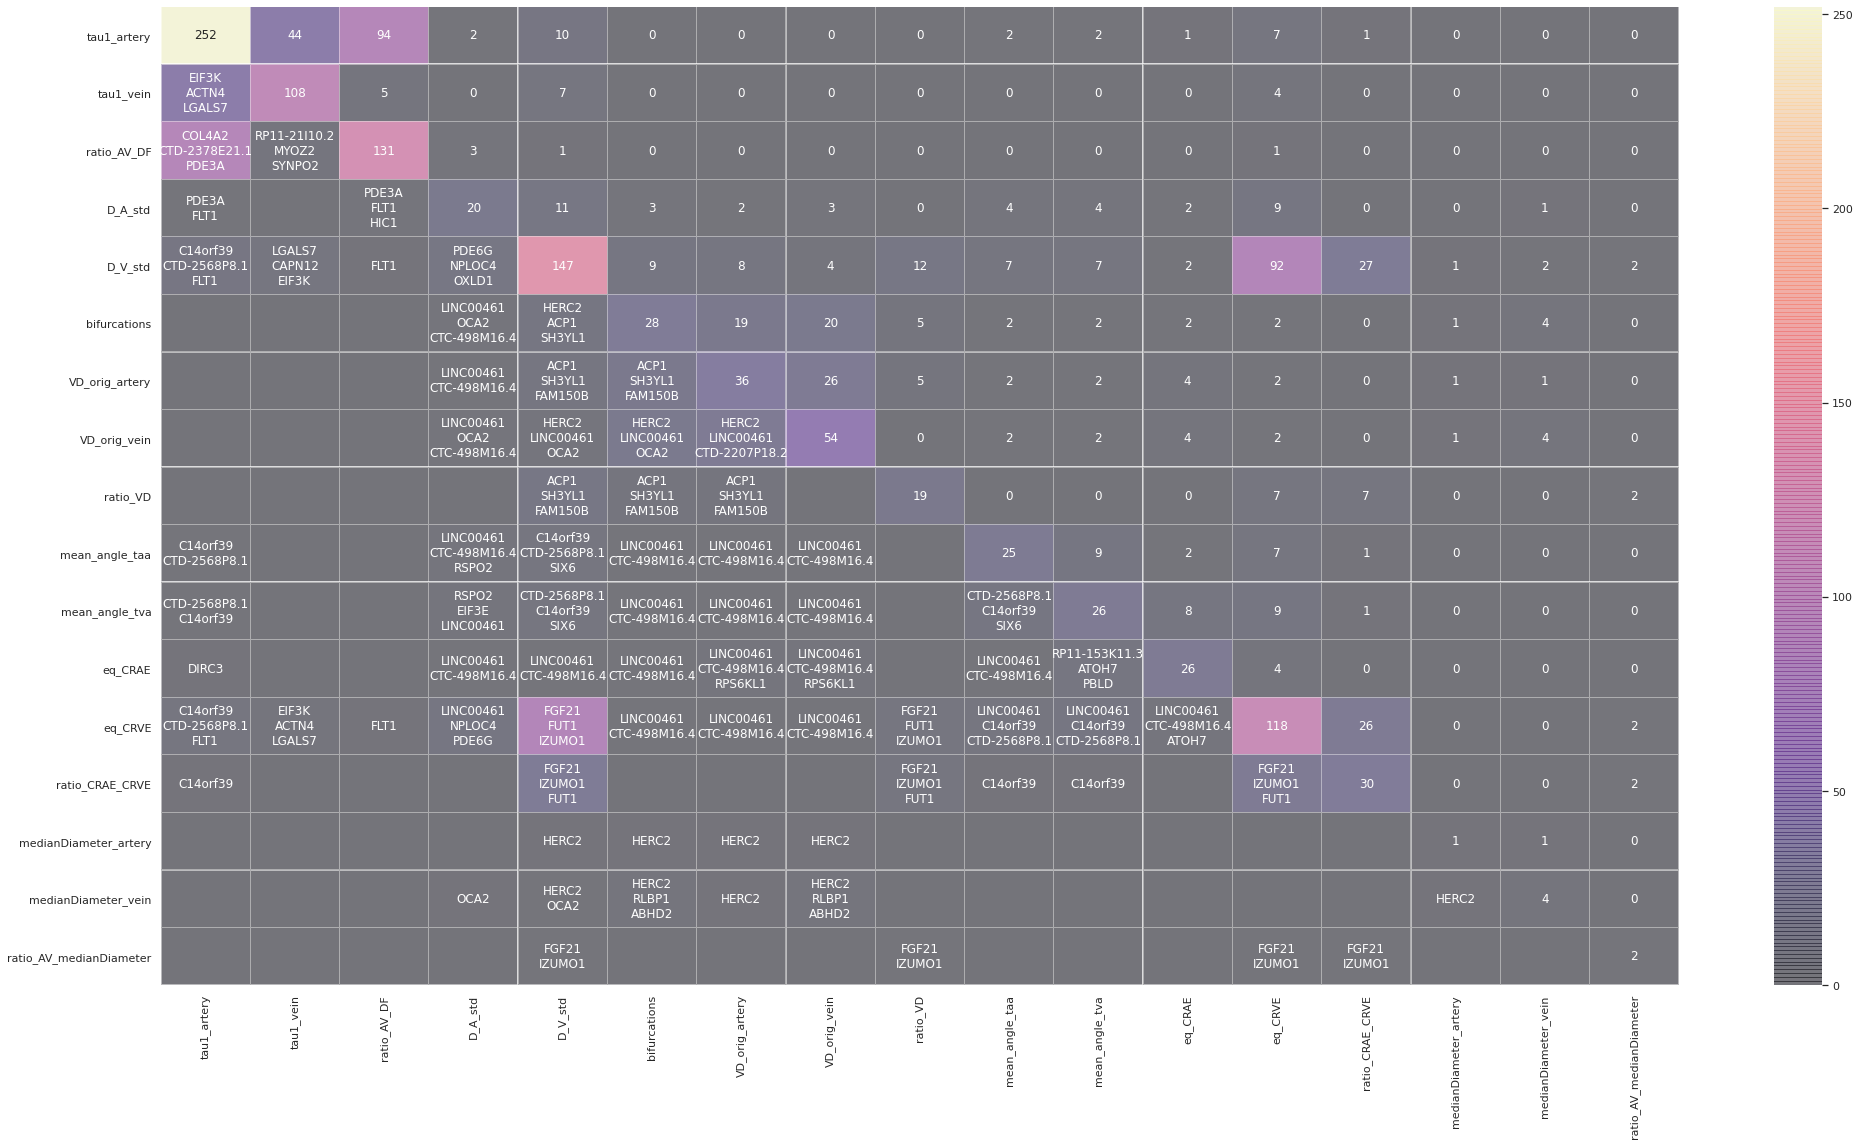

In [17]:
# Define the plot
fig, ax = plt.subplots(figsize=(34,18))

# Add title to the Heat map
#title = "Pharma Sector Heat Map"

# Set the font size and the distance of the title from the plot
#plt.title(title,fontsize=18)
#ttl = ax.title
#ttl.set_position([0.5,1.05])


x_axis_labels = list((df_names.columns))
y_axis_labels = list((df_names.index))
sns.set(font_scale=1) # font size 2
# Remove the axes
#ax.axis('off')

palette = sns.diverging_palette(60, 20, n=5)

sns.heatmap(results, annot=labels,fmt="",cmap='magma', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels, alpha=0.5)
#sns.heatmap(results, annot=labels,fmt="",cmap='YlOrRd', linewidths=0.30, alpha=0.5)

#plt.savefig('/SSD/home/sofia/fig_genes_intersection_main_vZekavat.pdf', format='pdf',  bbox_inches='tight', pad_inches=0.1, dpi=150)

# Use the heatmap function from the seaborn package
#matrix = np.triu(results)

#sns.heatmap(results, annot=labels,fmt="",cmap='Oranges', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels, mask=matrix)

#mask = np.tril(results)
#sns.heatmap(results, annot=labels,fmt="",cmap='Oranges', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels, mask=mask)

# Display the Pharma Sector Heatmap
plt.show()

<AxesSubplot:>

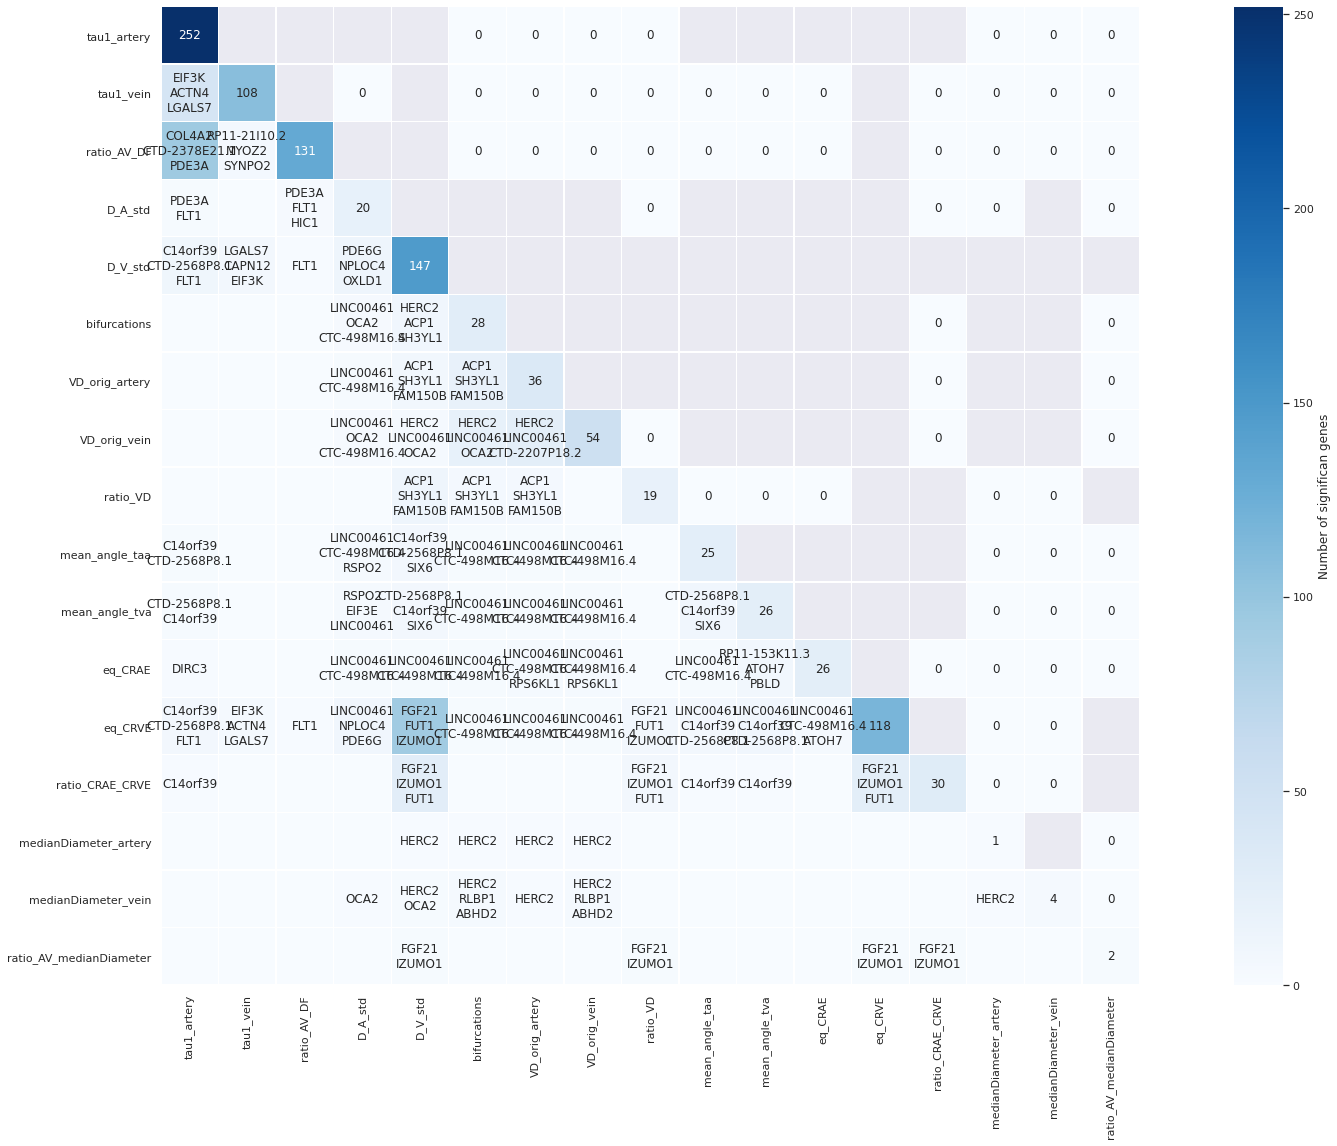

In [60]:
# Define the plot
fig, ax = plt.subplots(figsize=(34,18))

x_axis_labels = list((df_names.columns))
y_axis_labels = list((df_names.index))
sns.set(font_scale=1) # font size 2
# Remove the axes
#ax.axis('off')

palette = sns.diverging_palette(60, 20, n=5)

matrix = np.triu(results, k=+1)

sns.heatmap(results, annot=labels,fmt="", linewidths=0.30,  alpha=1.0,  xticklabels=x_axis_labels, yticklabels=y_axis_labels,mask=matrix,  square=True,
    cmap='Blues', 
    cbar_kws={'label': 'Number of significan genes'})
